In [1]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
#import contractions
import re
import random
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
additional  = ['rt','rts','retweet'] # lista adicional de stopwords
swords = set().union(stopwords.words('english'),additional) # adicionando palavras para o stopwords

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('D:\\SiDi\\Project\\dataset\\tweet_sentiment_analysis.csv')
df

,Unnamed: 0,date,text,cleantext,Sentimento
0,0,2021-02-10,#btc #bitcoin #Ethereum #ETH #dogecoin ...,"['cardano', 'solana', 'ath']",0.00
1,1,2021-02-10,#twitter #BTC #bitcoin #investing #smartmoney ...,['twitter'],0.00
2,2,2021-02-10,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['band', 'funding', 'back', 'normal', 'crash']",0.00
3,3,2021-02-10,Market Id : BTC-AUD\nLast Price :58199.44\n24 ...,"['market', 'id', 'btc', 'aud', 'last', 'price'...",0.00
4,4,2021-02-10,Bitcoin Update 📉\n\nCharts are released earlie...,"['bitcoin', 'update', 'charts', 'released', 'e...",0.00
...,...,...,...,...,...
9464,9464,2021-11-06,How To Invest in Real Estate and Succeed!\n#SH...,"['invest', 'real', 'estate', 'succeed']",0.00
9465,9465,2021-11-05,#IMX - short alert 🤦🏻💩\n\nTicker : $IMX\nM...,"['short', 'alert', 'ticker', 'imx', 'market', ...",0.00
9466,9466,2021-11-05,@WatcherGuru So bullish#INDC It has unlimited ...,"['bullish', 'unlimited', 'potential', 'scoopin...",0.00
9467,9467,2021-11-05,@RUShibbinMe 🪐🪐Spacelab Token - 5% BTC AWARDED...,"['spacelab', 'token', 'btc', 'awarded', 'autom...",0.00


In [3]:
df = df[df['Sentimento'].notna()]
df

,Unnamed: 0,date,text,cleantext,Sentimento
0,0,2021-02-10,#btc #bitcoin #Ethereum #ETH #dogecoin ...,"['cardano', 'solana', 'ath']",0.00
1,1,2021-02-10,#twitter #BTC #bitcoin #investing #smartmoney ...,['twitter'],0.00
2,2,2021-02-10,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['band', 'funding', 'back', 'normal', 'crash']",0.00
3,3,2021-02-10,Market Id : BTC-AUD\nLast Price :58199.44\n24 ...,"['market', 'id', 'btc', 'aud', 'last', 'price'...",0.00
4,4,2021-02-10,Bitcoin Update 📉\n\nCharts are released earlie...,"['bitcoin', 'update', 'charts', 'released', 'e...",0.00
...,...,...,...,...,...
9464,9464,2021-11-06,How To Invest in Real Estate and Succeed!\n#SH...,"['invest', 'real', 'estate', 'succeed']",0.00
9465,9465,2021-11-05,#IMX - short alert 🤦🏻💩\n\nTicker : $IMX\nM...,"['short', 'alert', 'ticker', 'imx', 'market', ...",0.00
9466,9466,2021-11-05,@WatcherGuru So bullish#INDC It has unlimited ...,"['bullish', 'unlimited', 'potential', 'scoopin...",0.00
9467,9467,2021-11-05,@RUShibbinMe 🪐🪐Spacelab Token - 5% BTC AWARDED...,"['spacelab', 'token', 'btc', 'awarded', 'autom...",0.00


In [4]:
indexes2Drop = df[df['date'].str.contains('bitcoin|Bitcoin|ETH|btc|BTC')].index
df.drop(indexes2Drop, inplace = True)
df['date'] = pd.to_datetime(df['date']).dt.date

ValueError: Cannot mask with non-boolean array containing NA / NaN values

<AxesSubplot:xlabel='date'>

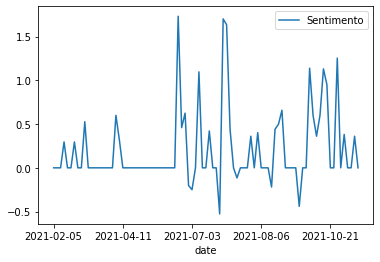

In [5]:
#pd.DatetimeIndex(df['date']).normalize()
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum().sort_values()
#df.groupby(pd.DatetimeIndex(df['date']).normalize())['Sentimento'].sum().plot(legend=True)
df.groupby(df['date'])['Sentimento'].sum().plot(legend=True)


In [6]:
# twFrame[(twFrame["Sentimento"].sort_values() > 0.2) | (twFrame["Sentimento"].sort_values() < -0.2) ]
# twFrame.groupby(pd.DatetimeIndex(twFrame['date']).normalize())['Sentimento'].sum()
g = df.groupby(pd.DatetimeIndex(df['date']).normalize()).sum()
g.reset_index(inplace = True)
g['Sentimento Norm'] = (g['Sentimento'] - g['Sentimento'].min())/(g['Sentimento'].max() - g['Sentimento'].min())
g

,date,Unnamed: 0,Sentimento,Sentimento Norm
0,2021-02-05,615,0.00,0.23
1,2021-02-06,1710,0.00,0.23
2,2021-02-07,825,0.00,0.23
3,2021-02-08,1887,0.30,0.36
4,2021-02-09,450,0.00,0.23
...,...,...,...,...
84,2021-10-28,2272005,0.38,0.40
85,2021-10-29,1367873,0.00,0.23
86,2021-11-04,1083266,0.00,0.23
87,2021-11-05,1692156,0.36,0.39


In [7]:
minmaxpoints = g[ (g['Sentimento'] >= 0.75) | (g['Sentimento'] <= 0.2) ]
minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
minmaxpoints

,date,Unnamed: 0,Sentimento,Sentimento Norm
0,2021-02-05,615,0.00,0.23
1,2021-02-06,1710,0.00,0.23
2,2021-02-07,825,0.00,0.23
4,2021-02-09,450,0.00,0.23
5,2021-02-10,78,0.00,0.23
...,...,...,...,...
82,2021-10-23,1379159,1.25,0.79
83,2021-10-27,861748,0.00,0.23
85,2021-10-29,1367873,0.00,0.23
86,2021-11-04,1083266,0.00,0.23


In [8]:
category = ['Negativo','Neutro','Positivo']
df['DSent'] = pd.cut(df['Sentimento'], bins=[-1,-0.5,0.5,1], labels=category)
df

,Unnamed: 0,date,text,cleantext,Sentimento,DSent
0,0,2021-02-10,#btc #bitcoin #Ethereum #ETH #dogecoin ...,"['cardano', 'solana', 'ath']",0.00,Neutro
1,1,2021-02-10,#twitter #BTC #bitcoin #investing #smartmoney ...,['twitter'],0.00,Neutro
2,2,2021-02-10,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['band', 'funding', 'back', 'normal', 'crash']",0.00,Neutro
3,3,2021-02-10,Market Id : BTC-AUD\nLast Price :58199.44\n24 ...,"['market', 'id', 'btc', 'aud', 'last', 'price'...",0.00,Neutro
4,4,2021-02-10,Bitcoin Update 📉\n\nCharts are released earlie...,"['bitcoin', 'update', 'charts', 'released', 'e...",0.00,Neutro
...,...,...,...,...,...,...
9464,9464,2021-11-06,How To Invest in Real Estate and Succeed!\n#SH...,"['invest', 'real', 'estate', 'succeed']",0.00,Neutro
9465,9465,2021-11-05,#IMX - short alert 🤦🏻💩\n\nTicker : $IMX\nM...,"['short', 'alert', 'ticker', 'imx', 'market', ...",0.00,Neutro
9466,9466,2021-11-05,@WatcherGuru So bullish#INDC It has unlimited ...,"['bullish', 'unlimited', 'potential', 'scoopin...",0.00,Neutro
9467,9467,2021-11-05,@RUShibbinMe 🪐🪐Spacelab Token - 5% BTC AWARDED...,"['spacelab', 'token', 'btc', 'awarded', 'autom...",0.00,Neutro


In [9]:
# from sklearn.preprocessing import OneHotEncoder

# oe_style = OneHotEncoder()
# oe_results = oe_style.fit_transform(df[['Dis_Sentimento']])
# pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)
# df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
# df

df1 = pd.get_dummies(df,columns=['DSent'])
df1

,Unnamed: 0,date,text,cleantext,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
0,0,2021-02-10,#btc #bitcoin #Ethereum #ETH #dogecoin ...,"['cardano', 'solana', 'ath']",0.00,0,1,0
1,1,2021-02-10,#twitter #BTC #bitcoin #investing #smartmoney ...,['twitter'],0.00,0,1,0
2,2,2021-02-10,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['band', 'funding', 'back', 'normal', 'crash']",0.00,0,1,0
3,3,2021-02-10,Market Id : BTC-AUD\nLast Price :58199.44\n24 ...,"['market', 'id', 'btc', 'aud', 'last', 'price'...",0.00,0,1,0
4,4,2021-02-10,Bitcoin Update 📉\n\nCharts are released earlie...,"['bitcoin', 'update', 'charts', 'released', 'e...",0.00,0,1,0
...,...,...,...,...,...,...,...,...
9464,9464,2021-11-06,How To Invest in Real Estate and Succeed!\n#SH...,"['invest', 'real', 'estate', 'succeed']",0.00,0,1,0
9465,9465,2021-11-05,#IMX - short alert 🤦🏻💩\n\nTicker : $IMX\nM...,"['short', 'alert', 'ticker', 'imx', 'market', ...",0.00,0,1,0
9466,9466,2021-11-05,@WatcherGuru So bullish#INDC It has unlimited ...,"['bullish', 'unlimited', 'potential', 'scoopin...",0.00,0,1,0
9467,9467,2021-11-05,@RUShibbinMe 🪐🪐Spacelab Token - 5% BTC AWARDED...,"['spacelab', 'token', 'btc', 'awarded', 'autom...",0.00,0,1,0


<AxesSubplot:xlabel='date'>

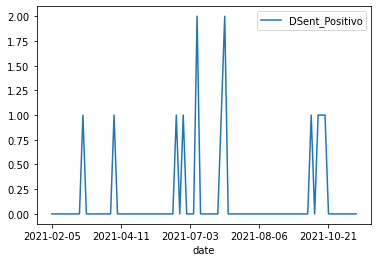

In [10]:
# df[('Positivo',)]
df1.groupby(df1['date'])['DSent_Positivo'].sum().plot(legend=True)

In [11]:
datapositivo = df1.groupby(pd.DatetimeIndex(df1['date'])).sum()
datapositivo.reset_index(inplace = True)
datapositivo

,date,Unnamed: 0,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo
0,2021-02-05,615,0.00,0.00,6.00,0.00
1,2021-02-06,1710,0.00,0.00,19.00,0.00
2,2021-02-07,825,0.00,0.00,11.00,0.00
3,2021-02-08,1887,0.30,0.00,37.00,0.00
4,2021-02-09,450,0.00,0.00,20.00,0.00
...,...,...,...,...,...,...
84,2021-10-28,2272005,0.38,0.00,261.00,0.00
85,2021-10-29,1367873,0.00,0.00,174.00,0.00
86,2021-11-04,1083266,0.00,0.00,116.00,0.00
87,2021-11-05,1692156,0.36,0.00,184.00,0.00


In [12]:
maxpoints = datapositivo[ (datapositivo['DSent_Positivo'] >= 50) ]
maxpoints['date'] = pd.to_datetime(maxpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
maxpoints

,date,Unnamed: 0,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo


In [13]:
maxpoints['date'] = maxpoints['date'].astype(str)
maxpointsList = list(maxpoints['date'])#ERROR: Command errored out with exit status 1:
maxpointsList

[]

In [14]:
btcPrice = pd.read_csv('D:\\SiDi\\Project\\dataset\\BTC-USD.csv')
# btcPrice[btcPrice['Date'] == '2021-02-08']


In [15]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
zz = btcPrice.query('Date in @maxpointsList')
btcPrice.loc[zz.index,'Positivo'] = True
btcPrice['Positivo'] = btcPrice['Positivo'].replace(np.nan,False)
btcPrice['Date']

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
2607    2021-11-06
2608    2021-11-07
2609    2021-11-08
2610    2021-11-09
2611    2021-11-10
Name: Date, Length: 2612, dtype: object

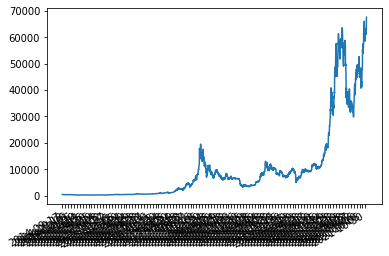

In [16]:
# btcPrice.plot(x='Date', y=['Close','teste'])

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['Positivo']]
x = btcPrice['Date']

fig, ax1 = plt.subplots()
ax1.plot(btcPrice['Date'], ts) 
plt.xticks(x[::25])
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()
plt.savefig('Positivo.png')

<AxesSubplot:xlabel='date'>

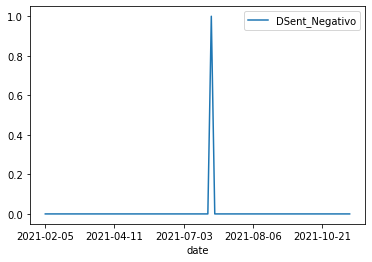

In [17]:
df1.groupby(df1['date'])['DSent_Negativo'].sum().plot(legend=True)

In [18]:
minpoints = datapositivo[ (datapositivo['DSent_Negativo'] >= 15) ]
minpoints['date'] = pd.to_datetime(minpoints['date']).dt.date
# minmaxpoints['date'] = pd.to_datetime(minmaxpoints['date'], format='%y-%m-%d')
minpoints

,date,Unnamed: 0,Sentimento,DSent_Negativo,DSent_Neutro,DSent_Positivo


In [19]:
minpoints['date'] = minpoints['date'].astype(str)
minpointsList = list(minpoints['date'])
minpointsList

[]

In [20]:
# btcPrice.loc[btcPrice['Date'].isin([aa])]
bticMin = btcPrice.query('Date in @minpointsList')
btcPrice.loc[bticMin.index,'Negativo'] = True
btcPrice['Negativo'] = btcPrice['Negativo'].replace(np.nan,False)
btcPrice['Date']

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
2607    2021-11-06
2608    2021-11-07
2609    2021-11-08
2610    2021-11-09
2611    2021-11-10
Name: Date, Length: 2612, dtype: object

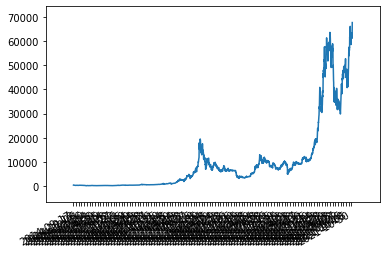

In [21]:
# btcPrice.plot(x='Date', y=['Close','teste'])

ts = btcPrice['Close'] 
ts2 = ts[btcPrice['Negativo']]
x = btcPrice['Date']

fig, ax1 = plt.subplots()
ax1.plot(x, ts)
plt.xticks(x[::25])
# plt.yticks(ts[::70])
plt.margins(0.1)
ax1.plot(ts2.index, ts2,'g^')
fig.autofmt_xdate()
# plt.savefig('teste.png')